In [1]:
import pandas as pd
import torch
import torchvision
import os
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torchvision.utils import save_image

In [2]:
#Defining class for loading the data

class CatVsDog(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations= pd.read_csv(csv_file)
        self.root_dir= root_dir
        self.transform= transform
        
    def __len__(self):
        return len(self.annotations)
    
    def __getitem__(self, index):
        img_path= os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image= Image.open(img_path)
        y_label= torch.tensor(int(self.annotations.iloc[index, 1]))
        
        if self.transform:
            image= self.transform(image)
            
        return (image, y_label)

In [3]:
my_transforms= transforms.Compose([
            transforms.ToPILImage(),
            transforms.ColorJitter(brightness= 0.5),
            transforms.Resize((256, 256)),
            transforms.RandomCrop((224, 224)),
            transforms.RandomRotation(degrees= 45),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomVerticalFlip(p=0.05),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomGrayscale(p=0.2),
            transforms.ToTensor()
])

In [4]:
#Load Data
dataset= CatVsDog(csv_file=r"C:\Users\shash\Downloads\Bepec\Datasets\Customization of Data in Pytorch\cats_dogs.csv", 
                  root_dir= r"C:\Users\shash\Downloads\Bepec\Datasets\Customization of Data in Pytorch\cats_dogs_resized",
                 transform=transforms.ToTensor(),
                )

In [6]:
save_dir= r"C:\Users\shash\Downloads\Bepec\Datasets\Customization of Data in Pytorch\cats_dogs_resized"
os.makedirs(save_dir, exist_ok= True)
img_num=0
for _ in range(10):
    for img, label in dataset:
        transformed_img= my_transforms(img)
        save_path= os.path.join(save_dir, 'img'+str(img_num)+'.png')
        save_image(transformed_img,save_path)
        img_num+=1

In [7]:
sample_img, _ = dataset[0]

augmented_img= my_transforms(sample_img)

sample_img_np= sample_img.permute(1, 2, 0).numpy()
augmented_img_np= augmented_img.permute(1, 2, 0).numpy()

(-0.5, 223.5, 223.5, -0.5)

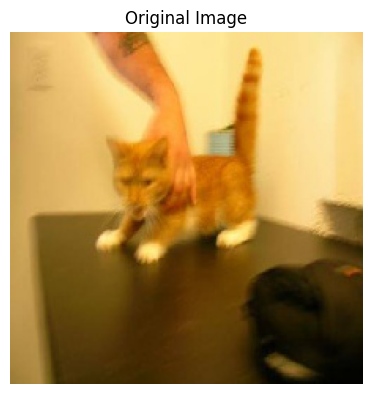

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(sample_img_np)
plt.title('Original Image')
plt.axis('off')

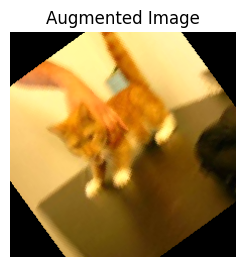

In [10]:
plt.subplot(1, 2, 2)
plt.imshow(augmented_img_np)
plt.title('Augmented Image')
plt.axis('off')
plt.show()